In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline



In [5]:
#reading the rating csv file and displaying the first 5 rows
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [7]:
#reading the movie csv file and displaying the first 5 rows
movie = pd.read_csv('movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
#merging both the rating and movie csv file and displaying the first 5 rows
data = pd.merge(ratings, movie, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [9]:
#displaying the avaerage movie rating in the dataset
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Saddest Music in the World, The (2003)                          5.0
Interstate 60 (2002)                                            5.0
Gunfighter, The (1950)                                          5.0
Heima (2007)                                                    5.0
Limelight (1952)                                                5.0
Plague Dogs, The (1982)                                         5.0
Love Me If You Dare (Jeux d'enfants) (2003)                     5.0
Syrup (2013)                                                    5.0
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003)    5.0
Symbol (Shinboru) (2009)                                        5.0
Name: rating, dtype: float64

In [10]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Saddest Music in the World, The (2003)                          5.0
Interstate 60 (2002)                                            5.0
Gunfighter, The (1950)                                          5.0
Heima (2007)                                                    5.0
Limelight (1952)                                                5.0
Plague Dogs, The (1982)                                         5.0
Love Me If You Dare (Jeux d'enfants) (2003)                     5.0
Syrup (2013)                                                    5.0
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003)    5.0
Symbol (Shinboru) (2009)                                        5.0
Name: rating, dtype: float64

In [11]:
#total number of rating for a movie
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
Star Wars: Episode IV - A New Hope (1977)    273
Matrix, The (1999)                           261
Terminator 2: Judgment Day (1991)            253
Braveheart (1995)                            248
Schindler's List (1993)                      248
Name: rating, dtype: int64

In [12]:
#add the mean rating to the dataframe
mean_rating= pd.DataFrame(data.groupby('title')['rating'].mean())
mean_rating.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [13]:
#add the total number of rating to the dataframe
mean_rating['total_no_rating'] = pd.DataFrame(data.groupby('title')['rating'].count())
mean_rating.head()

,rating,total_no_rating
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


<AxesSubplot:>

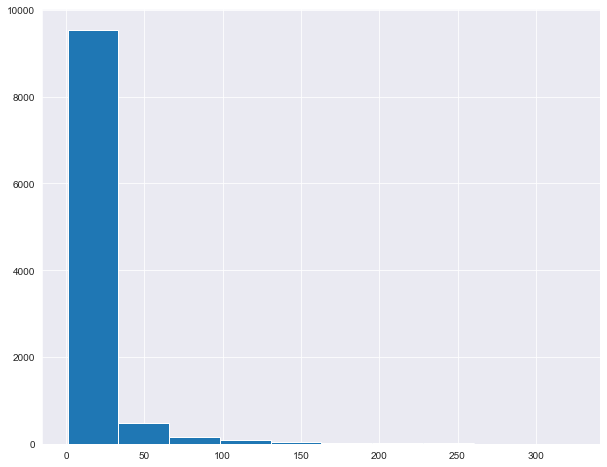

In [14]:
#histogram of total number of rating
plt.figure(figsize=(10,8))
mean_rating['total_no_rating'].hist(bins=10)

<AxesSubplot:>

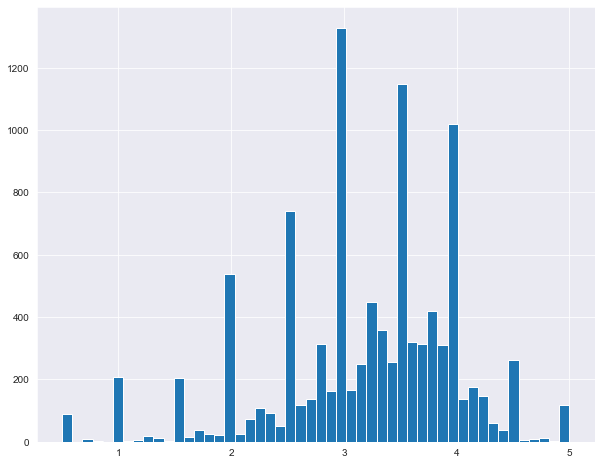

In [18]:
#histogram of average rating
plt.figure(figsize=(10,8))
mean_rating['rating'].hist(bins=50)

<Figure size 720x576 with 0 Axes>

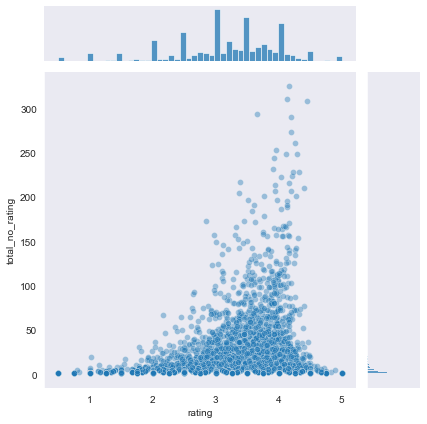

In [19]:
#scatter plot of rating and total number of rating
plt.figure(figsize=(10,8))
sns.jointplot(x='rating', y='total_no_rating', data=mean_rating, alpha=0.4)

In [41]:
#pivot table of movies titles and rating
user_rating = data.pivot_table(index='userId', columns='title', values='rating')
user_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#user ratings for Shawshank Redemption
Shawshank_Redemption_ratings = user_rating['Shawshank Redemption, The (1994)']
Shawshank_Redemption_ratings.head()

userId
1    NaN
2    3.0
3    NaN
4    NaN
5    3.0
Name: Shawshank Redemption, The (1994), dtype: float64

In [43]:
#correlation between the user ratings for The Shawshank Redemption and all the other movies
Shawshank_Redemption = user_rating.corrwith(Shawshank_Redemption_ratings)
corr_Shawshank_Redemption = pd.DataFrame(Shawshank_Redemption, columns=['Correlation'])
corr_Shawshank_Redemption.dropna(inplace=True)
corr_Shawshank_Redemption.head()

C:\Users\ademo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ademo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.419543
(500) Days of Summer (2009),0.249580
*batteries not included (1987),0.404520
...And Justice for All (1979),-1.000000
10 Cloverfield Lane (2016),0.145671


In [44]:
#show the top 5 correlated movies
corr_Shawshank_Redemption.sort_values('Correlation', ascending=False).head()

,Correlation
title,
"Principal, The (1987)",1.0
Outlander (2008),1.0
Chi-Raq (2015),1.0
"Changeling, The (1980)",1.0
Rififi (Du rififi chez les hommes) (1955),1.0


In [49]:
#adding the total no of rating column to the Shawshank redemption column
corr_Shawshank_Redemption = corr_Shawshank_Redemption.join(mean_rating['total_no_rating'])
corr_Shawshank_Redemption.head()

,Correlation,total_no_rating
title,,
"'burbs, The (1989)",0.419543,17
(500) Days of Summer (2009),0.249580,42
*batteries not included (1987),0.404520,7
...And Justice for All (1979),-1.000000,3
10 Cloverfield Lane (2016),0.145671,14


In [50]:
#displaying highly correlated movies with at least 50 total number of rating
corr_Shawshank_Redemption[corr_Shawshank_Redemption ['total_no_rating']>50].sort_values('Correlation', ascending=False).head()

,Correlation,total_no_rating
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Rear Window (1954),0.545149,84
My Cousin Vinny (1992),0.523016,59
Bad Boys (1995),0.516762,51
City of God (Cidade de Deus) (2002),0.486670,75


In [46]:
#correlation of all the other movies
user_rating = user_rating.dropna(thresh=10, axis=1).fillna(0,axis=1)
corrMatrix = user_rating.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581
